<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/Chapter_5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# **Linear SVM**

In [2]:
iris_data_set=datasets.load_iris()
iris_data_set.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X=iris_data_set['data'][:,(2,3)]
Y=(iris_data_set['target']==2)

In [4]:
svm_clf=Pipeline([('scalar',StandardScaler()),('linear svc',LinearSVC(C=1,loss="hinge"))])

In [5]:
svm_clf.fit(X,Y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('linear svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([[5.5,1.7]])

array([ True])

# **Nonlinear SVM**

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [8]:
X,Y=make_moons(n_samples=100,noise=0.15)

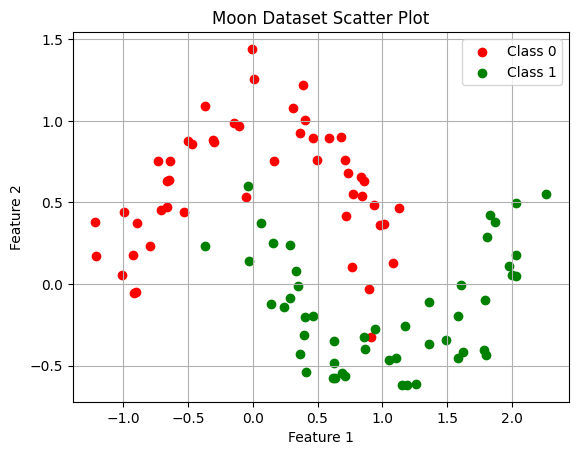

In [9]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red', label='Class 0', marker='o')  # Red dots for class 0
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='green', label='Class 1', marker='o')  # Green dots for class 1

# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moon Dataset Scatter Plot")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [10]:
polynomial_svm_clf=Pipeline([("poly_features",PolynomialFeatures(degree=3)),("Scaling",StandardScaler()),("SVM clf",LinearSVC(C=10,loss="hinge"))])

In [11]:
polynomial_svm_clf.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('Scaling', StandardScaler()),
                ('SVM clf', LinearSVC(C=10, loss='hinge'))])

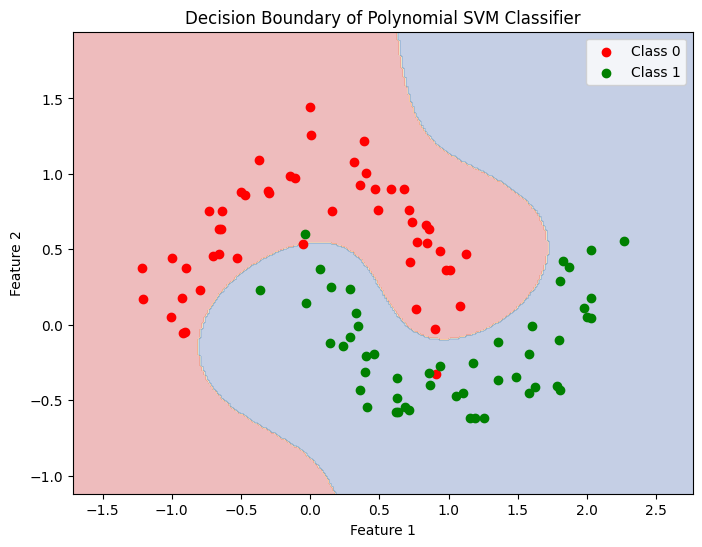

In [12]:
# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict on the mesh grid
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  # Decision boundary
plt.scatter(X[Y==0][:, 0], X[Y==0][:, 1], color="red", label="Class 0")  # Class 0
plt.scatter(X[Y==1][:, 0], X[Y==1][:, 1], color="green", label="Class 1")  # Class 1
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary of Polynomial SVM Classifier")
plt.show()

In [13]:
from sklearn.svm import SVC

In [14]:
polynomial_svm_clf=Pipeline([("Scaling",StandardScaler()),("SVM clf",SVC(kernel="poly",coef0=1,C=500))])

In [15]:
polynomial_svm_clf.fit(X, Y)

Pipeline(steps=[('Scaling', StandardScaler()),
                ('SVM clf', SVC(C=500, coef0=1, kernel='poly'))])

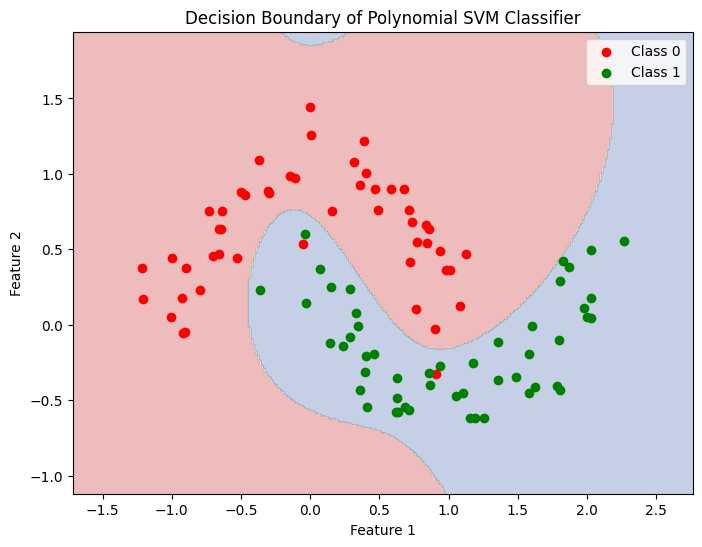

In [16]:
# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict on the mesh grid
Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  # Decision boundary
plt.scatter(X[Y==0][:, 0], X[Y==0][:, 1], color="red", label="Class 0")  # Class 0
plt.scatter(X[Y==1][:, 0], X[Y==1][:, 1], color="green", label="Class 1")  # Class 1
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary of Polynomial SVM Classifier")
plt.show()

In [23]:
rbf_svm_clf=Pipeline([("Scaling",StandardScaler()),("SVM clf",SVC(kernel="rbf",gamma=5,C=0.001))])

In [24]:
rbf_svm_clf.fit(X,Y)

Pipeline(steps=[('Scaling', StandardScaler()),
                ('SVM clf', SVC(C=0.001, gamma=5))])

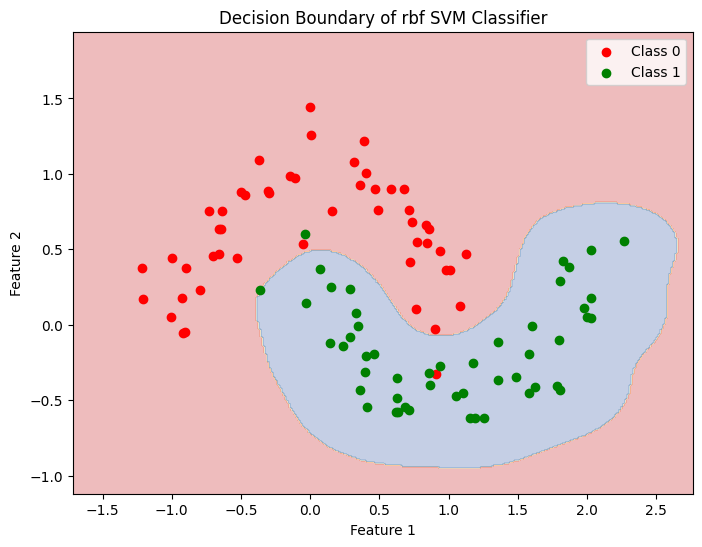

In [25]:
# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict on the mesh grid
Z = rbf_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)  # Decision boundary
plt.scatter(X[Y==0][:, 0], X[Y==0][:, 1], color="red", label="Class 0")  # Class 0
plt.scatter(X[Y==1][:, 0], X[Y==1][:, 1], color="green", label="Class 1")  # Class 1
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Decision Boundary of rbf SVM Classifier")
plt.show()

# **Linear SVR**

In [26]:
from sklearn.svm import LinearSVR

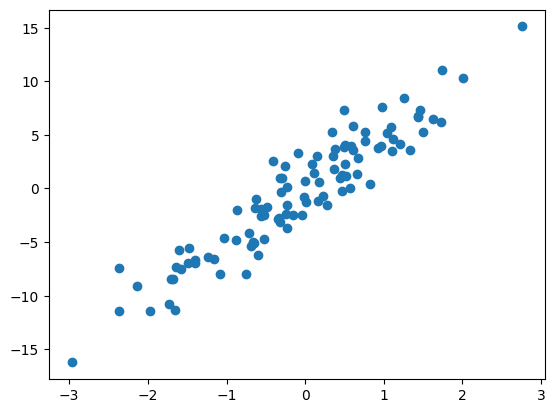

In [34]:
X=np.random.randn(1,100)
Y=5*X+np.random.randn(1,100)*2
plt.scatter(X,Y)

In [36]:
linear_SVR=Pipeline([("Scaling",StandardScaler()),("Linear SVR",LinearSVR(epsilon=1.5))])

In [43]:
linear_SVR.fit(X.ravel().reshape(-1, 1),Y.ravel())

Pipeline(steps=[('Scaling', StandardScaler()),
                ('Linear SVR', LinearSVR(epsilon=1.5))])

In [46]:
X_plot = np.linspace(X.min() - 1, X.max() + 1, 200).reshape(-1, 1)
Y_pred = linear_SVR.predict(X_plot)

In [47]:
epsilon=linear_SVR.named_steps['Linear SVR'].epsilon

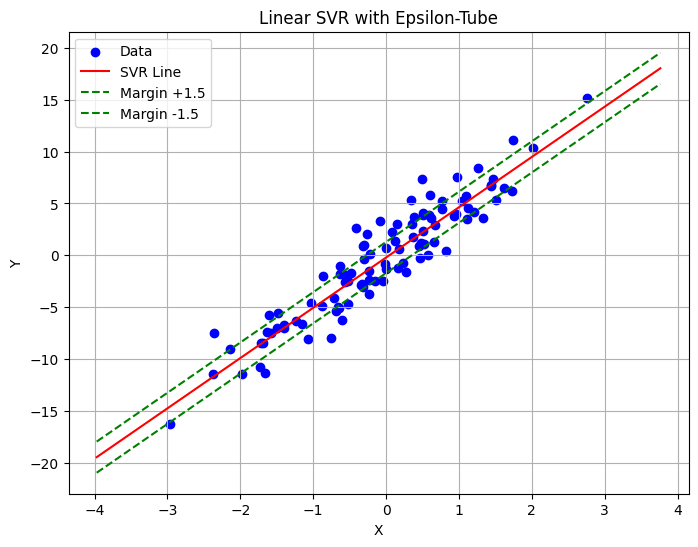

In [48]:
# Plot Data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data')

# Plot SVR Line (Regression Line)
plt.plot(X_plot, Y_pred, color='red', label='SVR Line')

# Plot Margin Lines (epsilon-tube)
plt.plot(X_plot, Y_pred + epsilon, 'g--', label=f'Margin +{epsilon}')
plt.plot(X_plot, Y_pred - epsilon, 'g--', label=f'Margin -{epsilon}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear SVR with Epsilon-Tube')
plt.legend()
plt.grid(True)
plt.show()

# **Poly Regressor**

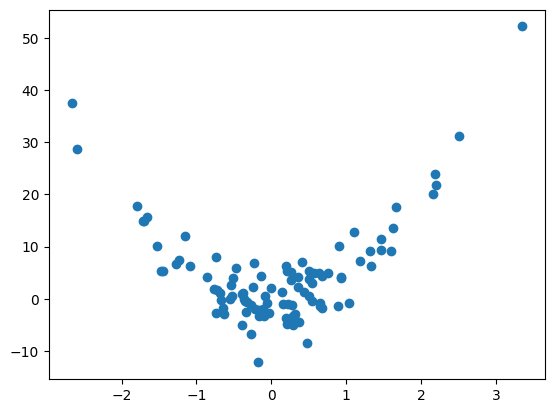

In [50]:
X=np.random.randn(1,100)
Y=5*X**2+np.random.randn(1,100)*4
plt.scatter(X,Y)

In [51]:
from sklearn.svm import SVR

In [62]:
poly_SVR=Pipeline([("Scaling",StandardScaler()),("poly SVR",SVR(kernel="poly",degree=2,epsilon=4))])

In [63]:
poly_SVR.fit(X.ravel().reshape(-1, 1),Y.ravel())

Pipeline(steps=[('Scaling', StandardScaler()),
                ('poly SVR', SVR(degree=2, epsilon=4, kernel='poly'))])

In [64]:
X_plot = np.linspace(X.min() - 1, X.max() + 1, 200).reshape(-1, 1)
Y_pred = poly_SVR.predict(X_plot)

In [65]:
epsilon=poly_SVR.named_steps['poly SVR'].epsilon

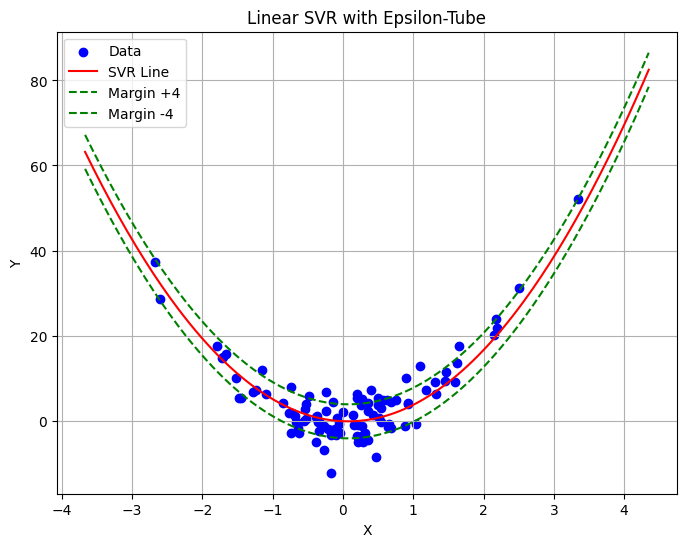

In [66]:
# Plot Data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data')

# Plot SVR Line (Regression Line)
plt.plot(X_plot, Y_pred, color='red', label='SVR Line')

# Plot Margin Lines (epsilon-tube)
plt.plot(X_plot, Y_pred + epsilon, 'g--', label=f'Margin +{epsilon}')
plt.plot(X_plot, Y_pred - epsilon, 'g--', label=f'Margin -{epsilon}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear SVR with Epsilon-Tube')
plt.legend()
plt.grid(True)
plt.show()